# Project Title: Credit Card Fraud Detection

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split

Dataset Download:
https://raw.githubusercontent.com/ArchanaInsights/Datasets/refs/heads/main/credit_card_transactions.csv

### Load the Dataset: 

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ArchanaInsights/Datasets/refs/heads/main/credit_card_transactions.csv")
df.head(5)

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,Mastercard,Utility bill,27214.0,2020-01-01 09:43:17,Patna,East,23.0,Female,94632.0,36369.65,100000.0,Unknown,Wednesday,No
1,V606KV56,American Express,Retail,83956.0,2020-01-03 16:26:13,Surat,West,49.0,Male,148118.0,89179.12,150000.0,Desktop,Friday,No
2,R531NU70,Visa,Transportation,193280.0,2020-01-04 03:40:49,Patna,East,NaN,Male,210921.0,106668.60,200000.0,Desktop,Saturday,No
3,T783GF79,RuPay,Online Shopping,167381.0,2020-01-04 14:56:24,Surat,West,52.0,Female,148070.0,173155.52,200000.0,Desktop,Saturday,Yes
4,K256ZN73,RuPay,Retail,81170.0,2020-01-04 17:26:47,Lucknow,North,37.0,Female,174470.0,52713.09,200000.0,Mobile,Saturday,No


In [3]:
df1= df.copy()

# Project Steps and Objectives:
## 1) Exploratory Data Analysis (EDA):

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Transaction_ID             5000 non-null   object 
 1   Card_Type                  4983 non-null   object 
 2   Merchant_Category          4978 non-null   object 
 3   Transaction_Amount         4994 non-null   float64
 4   Transaction_DateTime       5000 non-null   object 
 5   Location                   5000 non-null   object 
 6   Region                     5000 non-null   object 
 7   Cardholder_Age             4865 non-null   float64
 8   Cardholder_Gender          4911 non-null   object 
 9   Cardholder_Monthly_Income  4686 non-null   float64
 10  Cardholder_Average_Spend   4792 non-null   float64
 11  Credit_Limit               4991 non-null   float64
 12  Device_Type                4960 non-null   object 
 13  Day_of_Week                5000 non-null   objec

In [8]:
df1["Transaction_DateTime"]=pd.to_datetime(df1["Transaction_DateTime"])

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Transaction_ID             5000 non-null   object        
 1   Card_Type                  4983 non-null   object        
 2   Merchant_Category          4978 non-null   object        
 3   Transaction_Amount         4994 non-null   float64       
 4   Transaction_DateTime       5000 non-null   datetime64[ns]
 5   Location                   5000 non-null   object        
 6   Region                     5000 non-null   object        
 7   Cardholder_Age             4865 non-null   float64       
 8   Cardholder_Gender          4911 non-null   object        
 9   Cardholder_Monthly_Income  4686 non-null   float64       
 10  Cardholder_Average_Spend   4792 non-null   float64       
 11  Credit_Limit               4991 non-null   float64       
 12  Device

In [10]:
categorical_cols = df1.select_dtypes(include=['object']).columns.drop('Transaction_ID')

- **a) Analyze the distribution of categorical features such as Card_Type, Merchant_Category,
Location, etc.**

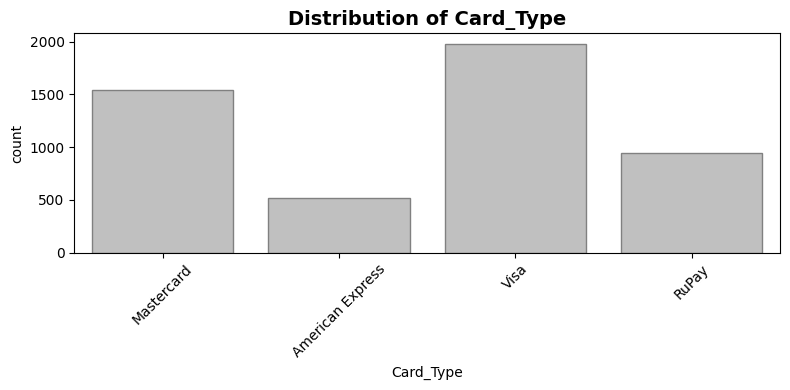

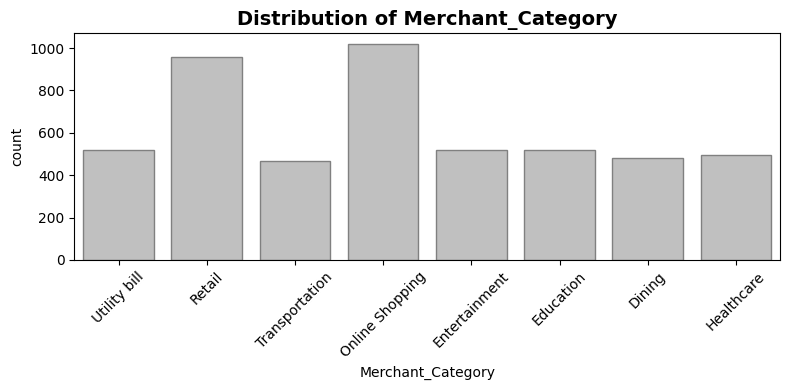

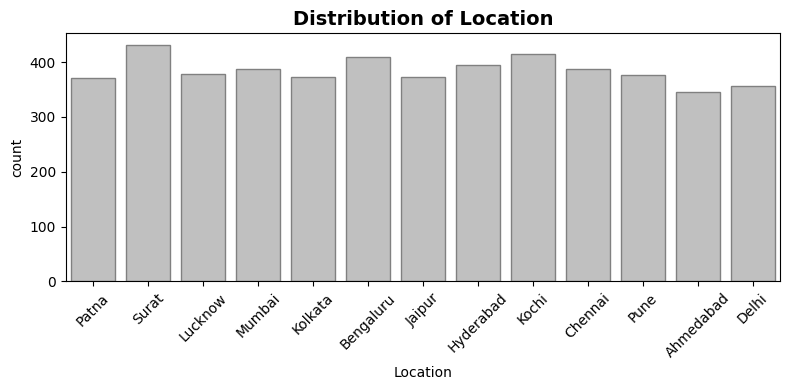

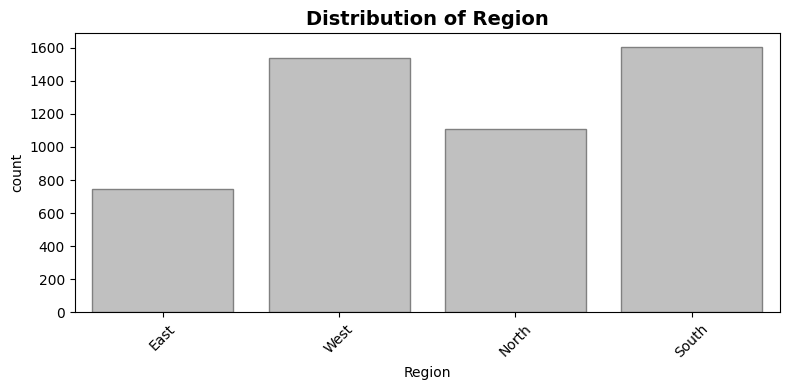

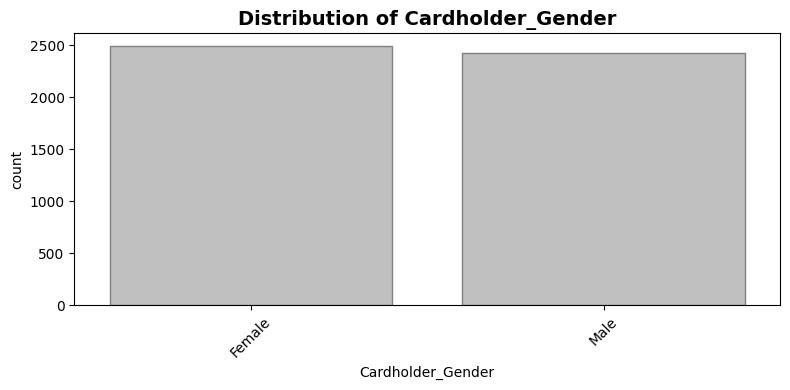

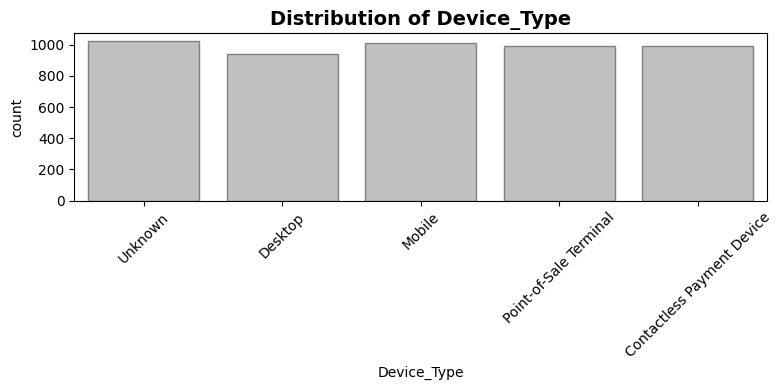

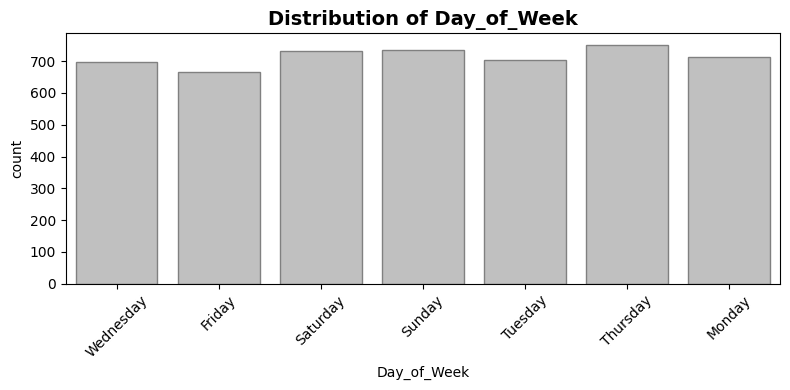

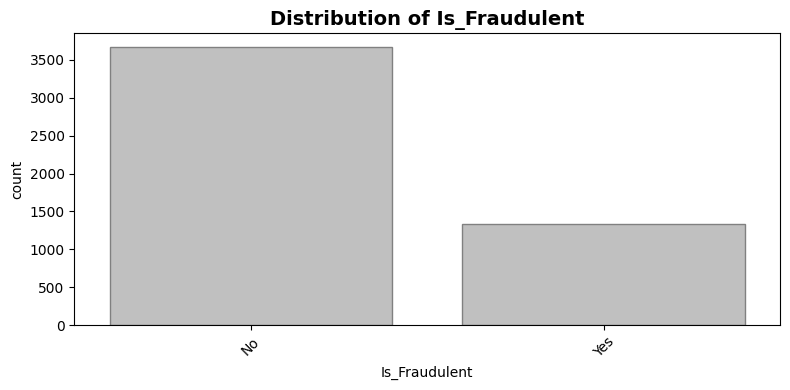

In [7]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, color="silver", edgecolor='gray')
    plt.title(f'Distribution of {col}', fontsize=14, fontweight="bold")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

- **b) Explore numerical features like Transaction_Amount, Cardholder_Age,
Cardholder_Monthly_Income, and Cardholder_Average_Spend. Use descriptive statistics to
understand their central tendency and spread.**

In [8]:
df1.describe()

,Transaction_Amount,Transaction_DateTime,Cardholder_Age,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit
count,4994.000000,5000,4865.000000,4686.000000,4792.000000,4991.000000
mean,74667.995995,2022-01-05 20:38:04.751000064,49.106680,137353.817542,63058.343566,124654.377880
min,25008.000000,2020-01-01 09:43:17,18.000000,35005.000000,10282.410000,50000.000000
25%,39742.500000,2021-01-06 02:38:58.500000,33.000000,73485.000000,33336.742500,100000.000000
50%,60922.000000,2022-01-06 22:41:33,49.000000,131833.000000,49547.945000,100000.000000
75%,98373.500000,2023-01-05 09:01:57.500000,65.000000,189054.250000,83732.352500,150000.000000
max,199923.000000,2023-12-30 11:41:36,80.000000,299907.000000,199898.290000,200000.000000
std,43089.045623,NaN,18.398524,69471.623020,40056.989704,55668.246494


In [5]:
numerical_cols = df1.select_dtypes(include=['float64']).columns

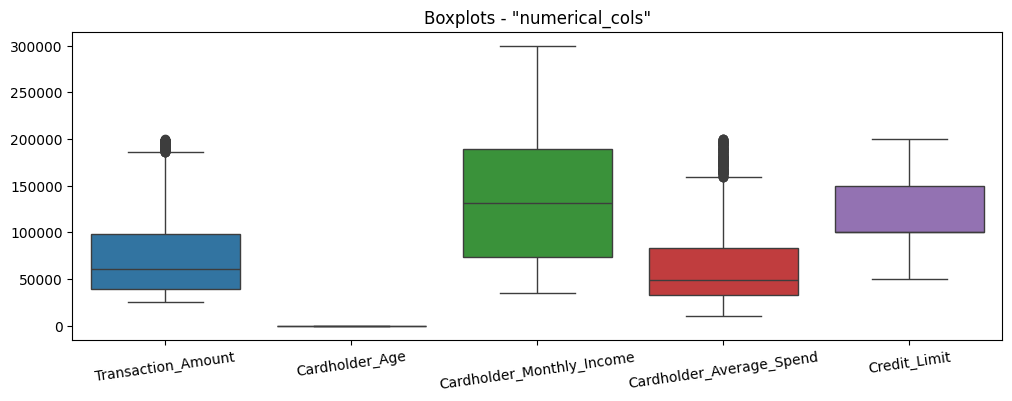

In [9]:
plt.figure(figsize=(12, 4))
sns.boxplot(data=df1[numerical_cols])
plt.title('Boxplots - "numerical_cols"')
plt.xticks(rotation=8)
plt.show()

- **c) Conduct bivariate and multivariate analysis to identify potential relationships between the
features as well as with the target variable (Is_Fraudulent).**

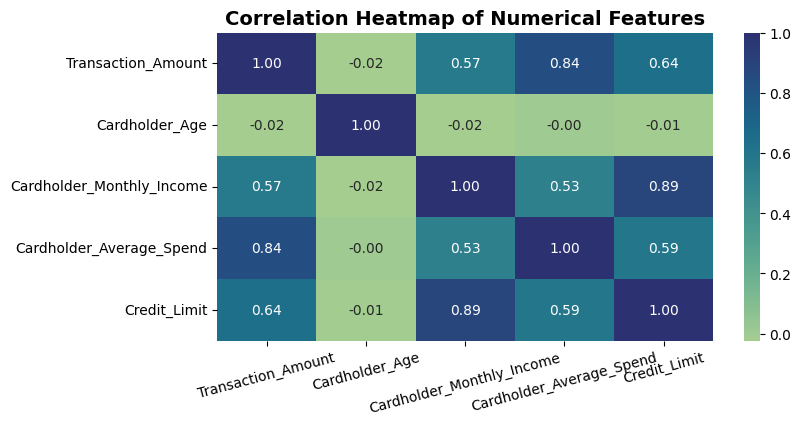

In [6]:
corr_matrix = df1[numerical_cols].corr()

plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap="crest", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features", fontsize=14, fontweight="bold")
plt.xticks(rotation=15)
plt.show()

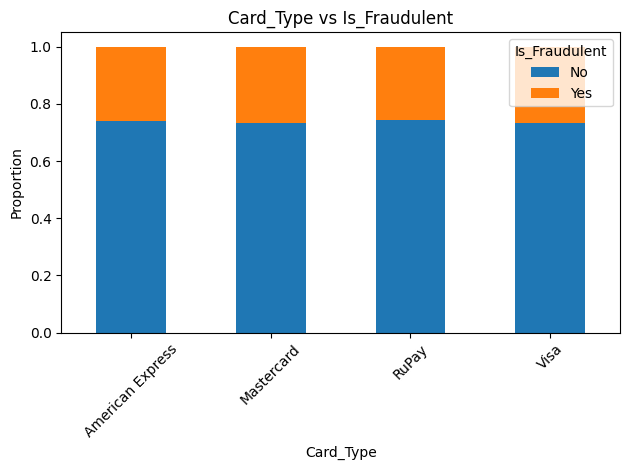

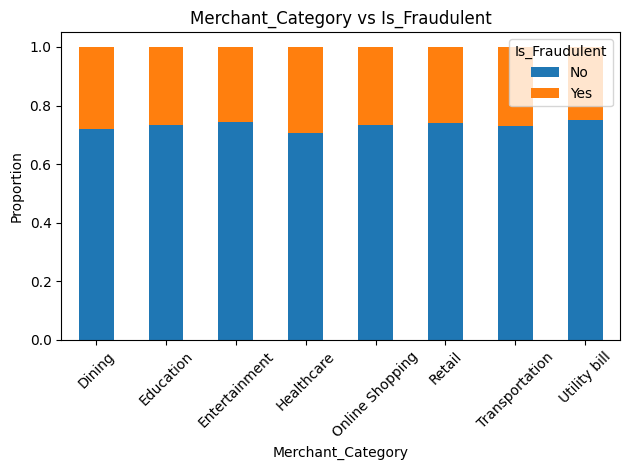

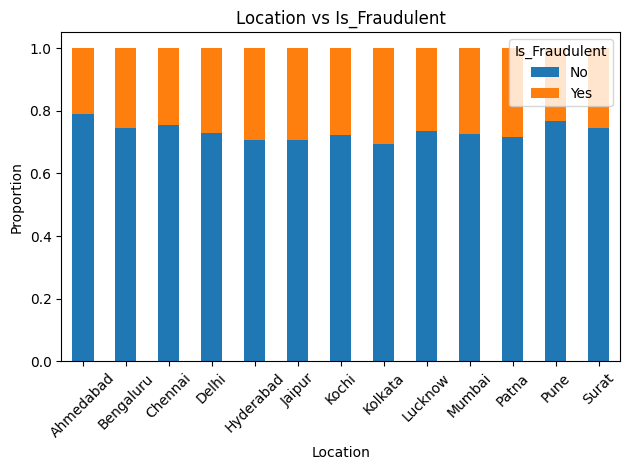

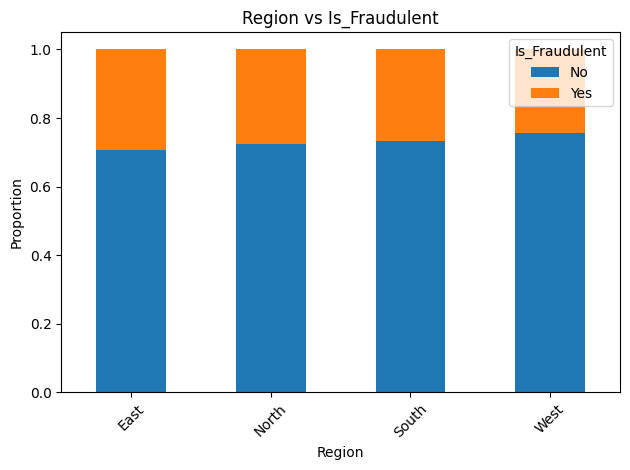

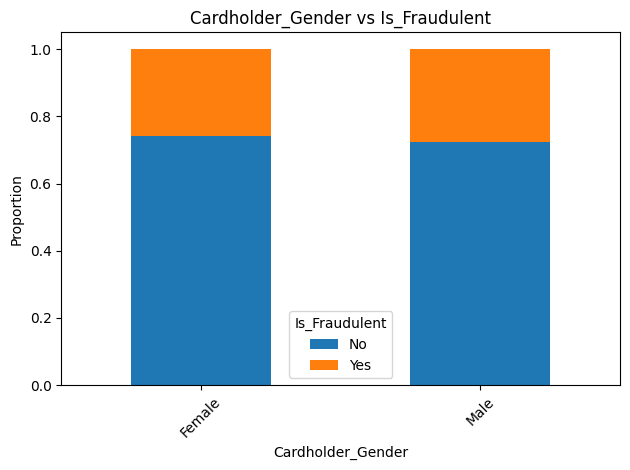

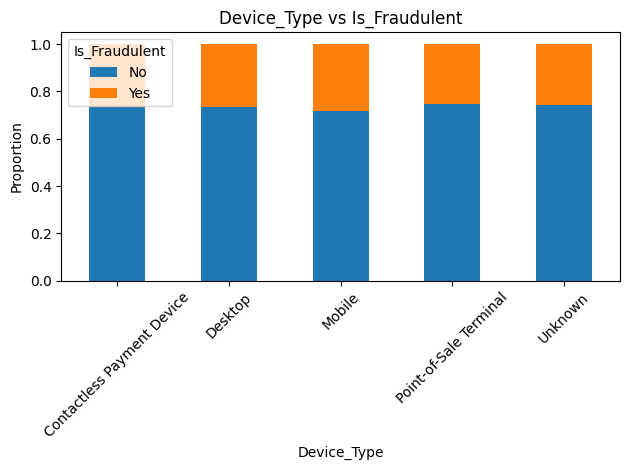

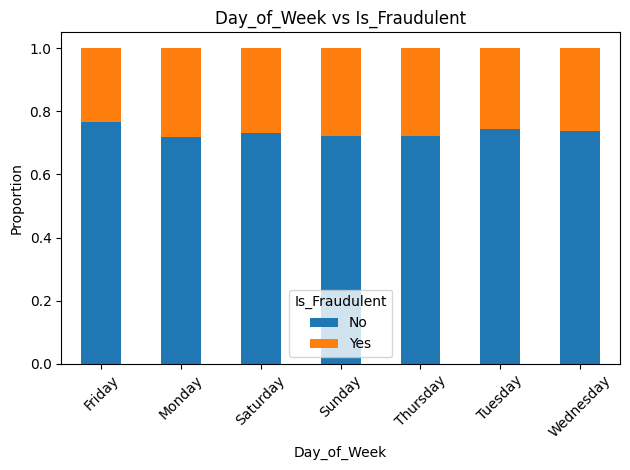

In [11]:
#Categorical vs Target:
for col in categorical_cols[:-1]:
    fraud_rate = pd.crosstab(df1[col], df1['Is_Fraudulent'], normalize='index')
    fraud_rate.plot(kind='bar', stacked=True)
    plt.title(f'{col} vs Is_Fraudulent')
    plt.ylabel("Proportion")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

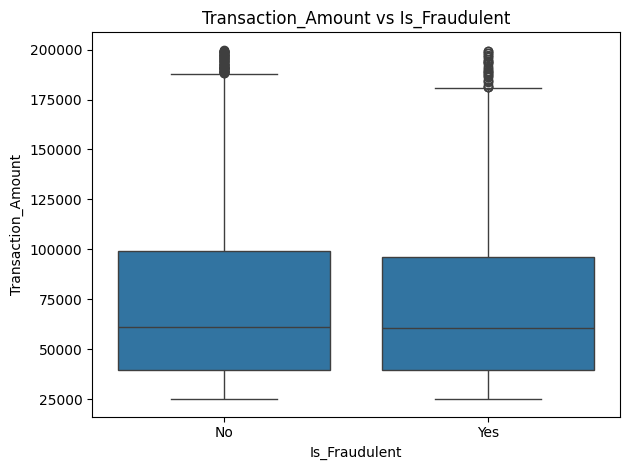

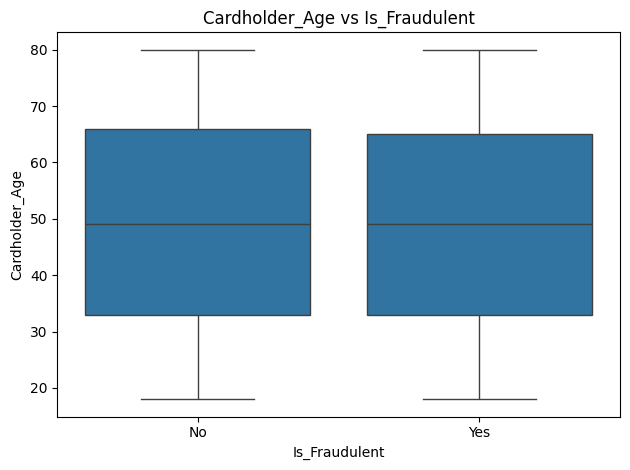

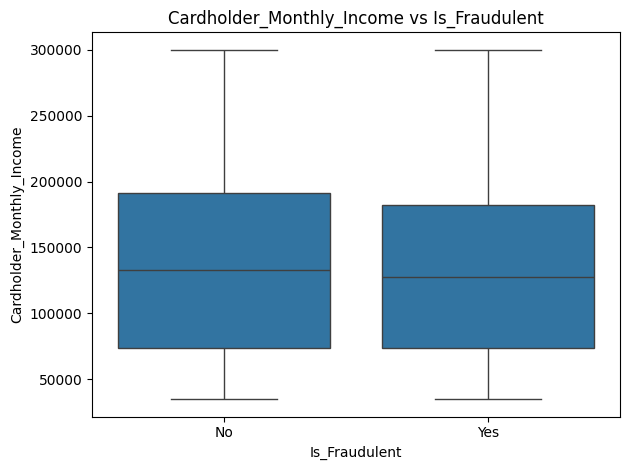

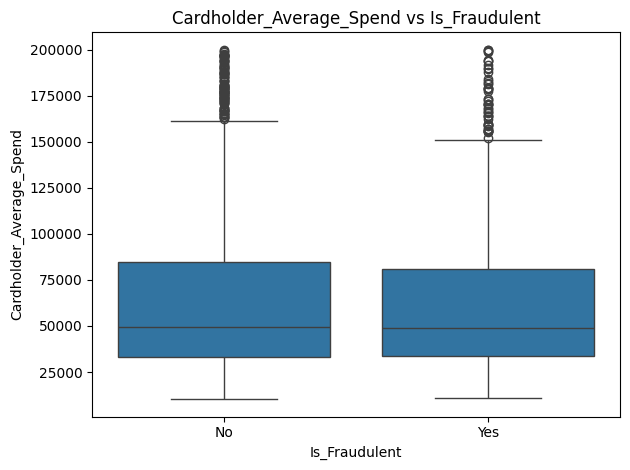

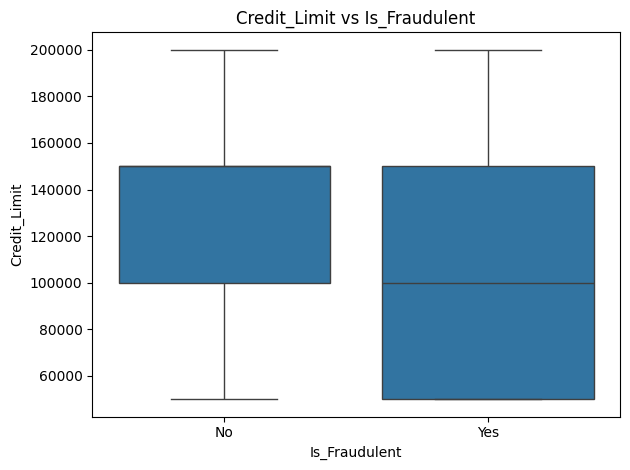

In [15]:
#Numerical vs Target (Boxplots):
for col in numerical_cols:
    sns.boxplot(data=df1, x='Is_Fraudulent', y=col)
    plt.title(f'{col} vs Is_Fraudulent')
    plt.tight_layout()
    plt.show()

- **d) Visualize the distribution of transaction amounts for fraudulent vs. non-fraudulent
transactions using histograms or box plots.**

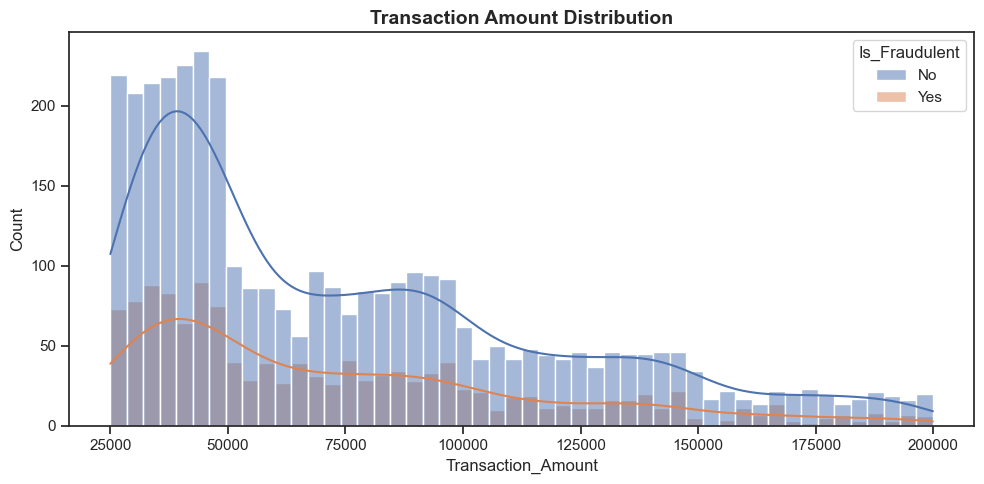

In [12]:
sns.set_theme(style="ticks")
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Transaction_Amount', hue='Is_Fraudulent', kde=True, bins=50)
plt.title('Transaction Amount Distribution', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

- **e) Investigate whether certain features are more susceptible to fraud.**

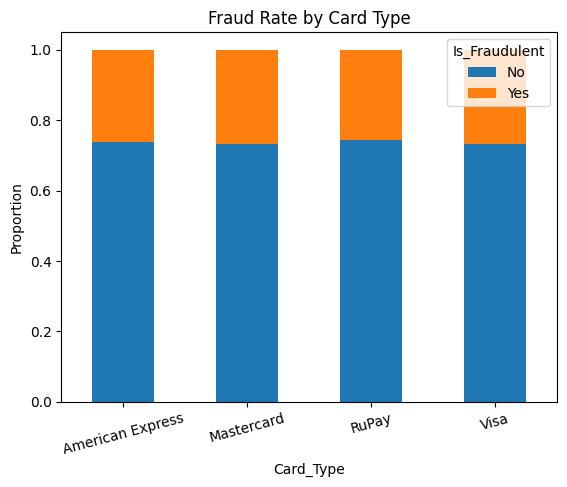

In [21]:
fraud_rate = df.groupby('Card_Type')['Is_Fraudulent'].value_counts(normalize=True).unstack().fillna(0)
fraud_rate.plot(kind='bar', stacked=True)
plt.title("Fraud Rate by Card Type")
plt.ylabel("Proportion")
plt.xticks(rotation=15)
plt.show()


## 2) Data Preprocessing - Data Cleaning:
- **a)	Handle missing values if any, using appropriate techniques such as KNNImputer; mean or median imputation for numerical features, and mode imputation for categorical features.**


In [13]:
df1.isna().sum()

Transaction_ID                 0
Card_Type                     17
Merchant_Category             22
Transaction_Amount             6
Transaction_DateTime           0
Location                       0
Region                         0
Cardholder_Age               135
Cardholder_Gender             89
Cardholder_Monthly_Income    314
Cardholder_Average_Spend     208
Credit_Limit                   9
Device_Type                   40
Day_of_Week                    0
Is_Fraudulent                  0
dtype: int64

In [14]:
#mean imputation for numerical features
for col in numerical_cols:
    df1[col]=df1[col].fillna(df1[col].mean())

In [15]:
#mode imputation for categorical features
for col in df1.select_dtypes(include=['object']).columns:
    df1[col]=df1[col].fillna(df1[col].mode()[0])

In [16]:
df1.isna().sum()

Transaction_ID               0
Card_Type                    0
Merchant_Category            0
Transaction_Amount           0
Transaction_DateTime         0
Location                     0
Region                       0
Cardholder_Age               0
Cardholder_Gender            0
Cardholder_Monthly_Income    0
Cardholder_Average_Spend     0
Credit_Limit                 0
Device_Type                  0
Day_of_Week                  0
Is_Fraudulent                0
dtype: int64

- **b)	Check for outliers in numerical features using statistical methods like Z-score or IQR (Interquartile Range) and remove them if necessary to ensure data quality.**

In [17]:
for col in numerical_cols:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df1 = df1[(df1[col] >= lower_bound) & (df1[col] <= upper_bound)]
print(f"Remaining rows after outlier removal: {df1.shape[0]}")

Remaining rows after outlier removal: 4746


- **c)	Assess skewness in numerical features by calculating the skewness score. If any features are highly skewed, consider applying transformations such as square root or log transformation to improve their distribution before scaling, if needed.**

In [18]:
#numerical features by calculating the skewness score

print(df1['Transaction_Amount'].skew())

print(df1['Cardholder_Age'].skew())

print(df1['Cardholder_Monthly_Income'].skew())

print(df1['Cardholder_Average_Spend'].skew())

print(df1['Credit_Limit'].skew())

0.9343163226542156
-0.0106893400249129
0.4948589278186003
0.8996510282876518
0.091206794461929


In [19]:
for col in df1.select_dtypes(include=['float64']).columns:
    if (df1[col] <= 0).any():
        df1[col] = np.sqrt(df1[col] - df1[col].min() + 1)
    else:
        df1[col] = np.log1p(df1[col]) 

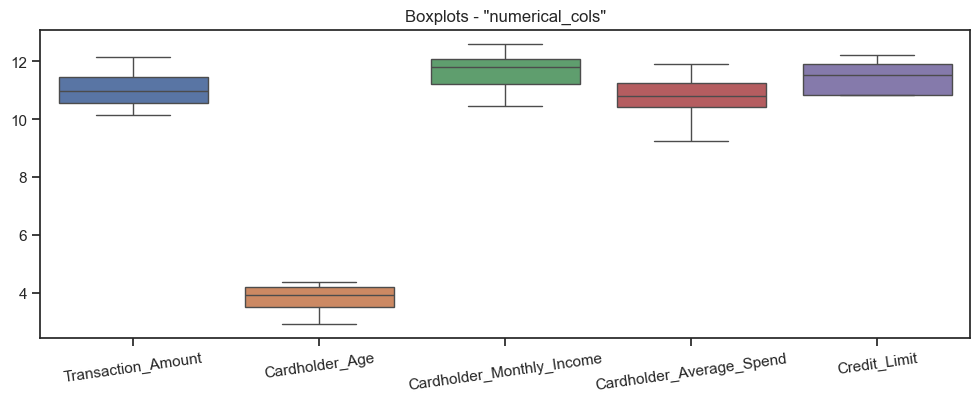

In [20]:
plt.figure(figsize=(12, 4))
sns.boxplot(data=df1[numerical_cols])
plt.title('Boxplots - "numerical_cols"')
plt.xticks(rotation=8)
plt.show()

## 3) Feature Engineering:
- **a)	Identify the categorical features in the dataset.**


In [22]:
print("categorical features in the dataset : ")
categorical_cols

categorical features in the dataset : 


Index(['Card_Type', 'Merchant_Category', 'Location', 'Region',
       'Cardholder_Gender', 'Device_Type', 'Day_of_Week', 'Is_Fraudulent'],
      dtype='object')

- **b)	Encode categorical features to numerical using techniques like one-hot encoding or label encoding techniques to prepare the data for machine learning algorithms.**

In [81]:
df1["Card_Type"].unique()

array(['Mastercard', 'American Express', 'RuPay', 'Visa'], dtype=object)

In [82]:
df1["Merchant_Category"].unique()

array(['Utility bill', 'Retail', 'Entertainment', 'Online Shopping',
       'Education', 'Dining', 'Transportation', 'Healthcare'],
      dtype=object)

In [83]:
df1["Location"].unique()

array(['Patna', 'Surat', 'Lucknow', 'Mumbai', 'Kolkata', 'Bengaluru',
       'Jaipur', 'Hyderabad', 'Kochi', 'Chennai', 'Pune', 'Ahmedabad',
       'Delhi'], dtype=object)

In [84]:
df1["Region"].unique()

array(['East', 'West', 'North', 'South'], dtype=object)

In [85]:
df1["Cardholder_Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [86]:
df1["Device_Type"].unique()

array(['Unknown', 'Desktop', 'Mobile', 'Point-of-Sale Terminal',
       'Contactless Payment Device'], dtype=object)

In [87]:
df1["Day_of_Week"].unique()

array(['Wednesday', 'Friday', 'Saturday', 'Sunday', 'Tuesday', 'Thursday',
       'Monday'], dtype=object)

In [88]:
df1["Is_Fraudulent"].unique()

array(['No', 'Yes'], dtype=object)

In [22]:
le = LabelEncoder()
for col in df1.select_dtypes(include=['object']).columns.drop('Transaction_ID'):
    df1[col] = le.fit_transform(df1[col])

In [23]:
df1.head()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,1,7,10.211524,2020-01-01 09:43:17,10,0,3.178054,0,11.457762,10.501517,11.512935,4,6,0
1,V606KV56,0,5,11.338060,2020-01-03 16:26:13,12,3,3.912023,1,11.905771,11.398413,11.918397,1,0,0
4,K256ZN73,2,5,11.304313,2020-01-04 17:26:47,8,1,3.637586,0,12.069514,10.872638,12.206078,2,2,0
5,I812SG19,2,2,11.789943,2020-01-04 19:55:12,9,3,4.394449,1,12.023783,11.294700,11.918397,3,2,0
6,Y182UO40,3,5,11.842495,2020-01-05 16:33:10,12,3,3.526361,1,12.055203,11.341149,11.918397,1,3,1


## 4) Feature Selection:
- **a)	Select relevant features that have the most impact on predicting fraudulent transactions.**

In [24]:
X = df1.drop(['Is_Fraudulent', 'Transaction_ID', 'Transaction_DateTime'], axis=1)
y = df1['Is_Fraudulent']

- **b)	Identify and remove redundant or irrelevant features that do not contribute significantly to the prediction task.**

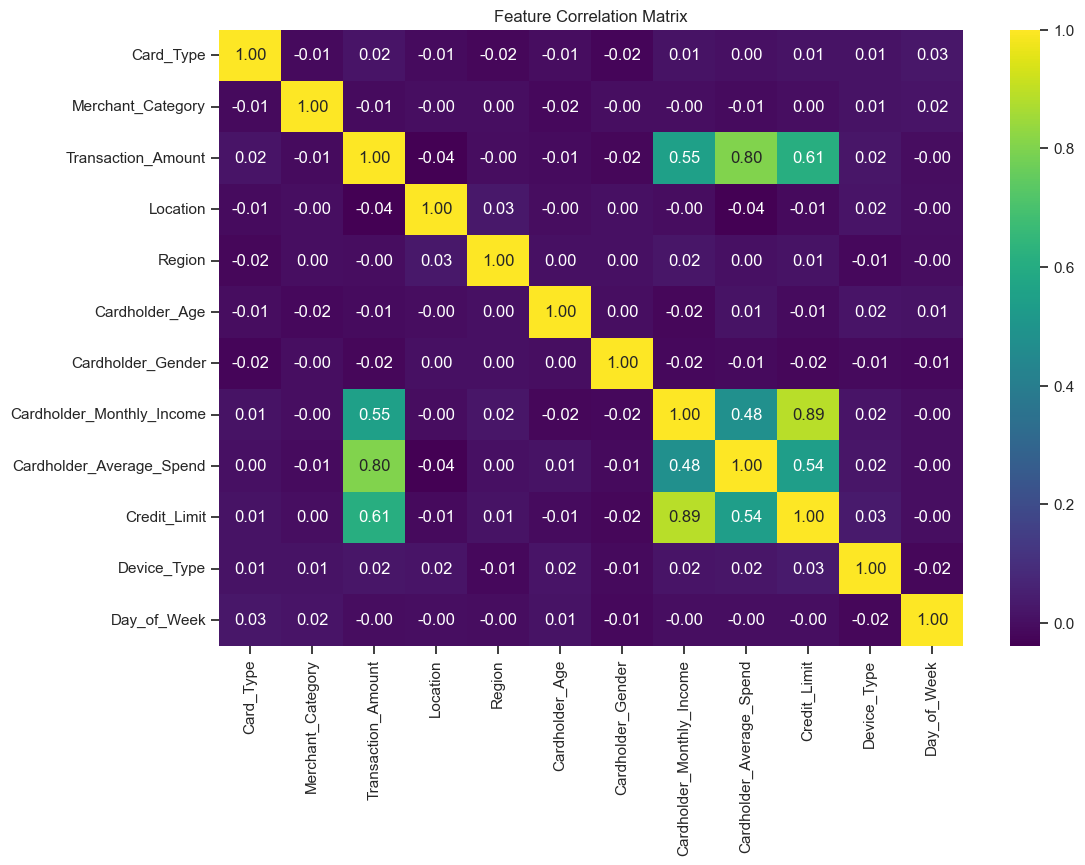

In [25]:
plt.figure(figsize=(12, 8))
sns.heatmap(X.select_dtypes(include=['number']).corr(), annot=True, fmt=".2f", cmap='viridis')
plt.title("Feature Correlation Matrix")
plt.show()

## 5) Split data into training and testing:
- **a)	Divide the dataset into training and testing sets to evaluate the model's performance.**

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

- **b)	Ensure that both sets maintain the same distribution of fraudulent and non-fraudulent transactions to avoid data leakage.**

In [27]:
print(f" X_train.shape : {X_train.shape} ")
print(f" X_test.shape : {X_test.shape} ")
print(f" y_train.shape : {y_train.shape} ")
print(f" y_test.shape : {y_test.shape} ")

 X_train.shape : (3796, 12) 
 X_test.shape : (950, 12) 
 y_train.shape : (3796,) 
 y_test.shape : (950,) 


In [28]:
print("Train fraud ratio:", y_train.mean())
print("Test fraud ratio:", y_test.mean())

Train fraud ratio: 0.267913593256059
Test fraud ratio: 0.25894736842105265


## 6) Feature Scaling:
- **a)	Scale numerical features to ensure that they have the same magnitude, preventing some features from dominating others during model training.**
- **b)	Common scaling techniques include Min-Max scaling or Standardization (Z-score normalization).**

In [29]:
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

## 7) Build the Machine Learning Model:
- **a)	Import the necessary modules and libraries for building and evaluating machine learning models.**

In [35]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, precision_score, recall_score

- **b)	Define a list or dictionary of classifiers to be evaluated; including Logistic Regression, Naive Bayes, Decision Tree, Random Forest, K-Nearest Neighbors, and SVM. Then, compute the accuracy score and F1-score for each classifier.**

In [37]:
models = { "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "SVM": SVC() }

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    results.append({'Model': name, 'Accuracy': acc, 'F1 Score': f1})

results_df = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False)
print(results_df)

                 Model  Accuracy  F1 Score
4  K-Nearest Neighbors  0.668421  0.636692
3        Random Forest  0.737895  0.634974
0  Logistic Regression  0.741053  0.630836
1          Naive Bayes  0.741053  0.630836
5                  SVM  0.741053  0.630836
2        Decision Tree  0.608421  0.611400


- **c)	Select a machine learning algorithm for binary classification with the highest accuracy or F1-score from the above step.**

>**Logistic Regression, Naive Bayes, and SVM show the highest Accuracy (0.741053).**

> **K-Nearest Neighbors (KNN) has the highest F1 Score (0.636692), even though its accuracy is slightly lower.**

In [38]:
best_model = KNeighborsClassifier()
best_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

- **d)	Train the selected model using the training dataset and evaluate its performance using appropriate metrics like confusion matrix, accuracy, precision, recall, and F1-score.**

In [39]:
y_pred = best_model.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print(f"\n Accuracy: {accuracy:.4f}")
print(f" Precision: {precision:.4f}")
print(f" Recall: {recall:.4f}")
print(f" F1 Score: {f1:.4f}")

Confusion Matrix:
 [[597 107]
 [208  38]]

 Accuracy: 0.6684
 Precision: 0.2621
 Recall: 0.1545
 F1 Score: 0.1944


- **e)	Validate the model's performance on the testing dataset and interpret the results to assess its effectiveness in detecting fraudulent transactions.**

In [40]:
print("\nClassification Report:")
print("-"*35)
print(classification_report(y_test, y_pred))

if recall > 0.7 and f1 > 0.65:
    print("The model is performing well in finding fraud cases.")
elif recall > 0.5:
    print("The model is okay. You might need to improve it or try another one.")
else:
    print("The model is not good at finding fraud. It needs to be improved.")


Classification Report:
-----------------------------------
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       704
           1       0.26      0.15      0.19       246

    accuracy                           0.67       950
   macro avg       0.50      0.50      0.49       950
weighted avg       0.62      0.67      0.64       950

The model is not good at finding fraud. It needs to be improved.
